## Ejercicio Modulo 3

En este ejercicio vamos a utilizar el dataset **`Diamonds.csv`**, este csv contiene información sobre diferentes tipos de diamantes.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.


In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

import plotly # Para ver la versión
import plotly.express as px


In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"plotly=={plotly.__version__}")

numpy==2.2.0
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2
plotly==5.24.1


PARTE 1: 25 % carga y limpieza

- Carga con Pandas: pd.read_csv




In [3]:
df = pd.read_csv('diamonds.csv')

df.head()

carat      cut color clarity  depth  table price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75

In [4]:
df.tail()

carat        cut color clarity  depth  table price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64

Visualizamos la informacion del Dataframe


In [5]:
print('Tamaño del DataFrame:', df.shape)

Tamaño del DataFrame: (53940, 10)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


Mostamos las columnas del DataFrame en una lista.

In [7]:
columnas = df.columns.tolist() 
columnas

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Limpieza de valores error:

- hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

In [8]:
df.replace('?', np.nan, inplace = True)

hay columnas que tienen valor 0, por tanto se deben reemplazar por un valor nan.

In [9]:
df.replace(0, np.nan, inplace = True)

In [10]:
def datos_faltantes():
    missing_data = df.isnull().sum()
    total_missing = missing_data.sum()

    print(f'En total hay {total_missing} datos faltantes en el DataFrame.')
    
    if total_missing > 0:

        for column, missing in missing_data.items():
            print(f'En la columna: {column} hay {missing} datos faltantes.')


Investigamos los valores nulos

In [11]:
datos_faltantes()

En total hay 47 datos faltantes en el DataFrame.
En la columna: carat hay 1 datos faltantes.
En la columna: cut hay 4 datos faltantes.
En la columna: color hay 3 datos faltantes.
En la columna: clarity hay 2 datos faltantes.
En la columna: depth hay 0 datos faltantes.
En la columna: table hay 2 datos faltantes.
En la columna: price hay 3 datos faltantes.
En la columna: x hay 3 datos faltantes.
En la columna: y hay 8 datos faltantes.
En la columna: z hay 21 datos faltantes.


### Limpieza de nulos (limpiar valores NaN):
- Para las columnas 'cut' y 'color' las rellenamos con la moda
- Para las columnas numericas calculamos la mediana y reemplazamos los valores NaN

In [12]:
def limpiar_NaN(df, column):
    if column in ['cut', 'color', 'clarity']:
        dato_limpio = df[column].mode().iloc[0]
    else:
        dato_limpio = df[column].astype("float").median(axis=0)
    
    print(f'El dato de la columna {column} se ha cambiado por: {dato_limpio}')
    df[column] = df[column].replace(np.nan, dato_limpio)

In [13]:
# Limpieza de nulos
missing_data = df.isnull().sum()
for column, missing in missing_data.items():
    if missing > 0:
        limpiar_NaN(df, column)


El dato de la columna carat se ha cambiado por: 0.7
El dato de la columna cut se ha cambiado por: Ideal
El dato de la columna color se ha cambiado por: G
El dato de la columna clarity se ha cambiado por: SI1
El dato de la columna table se ha cambiado por: 57.0
El dato de la columna price se ha cambiado por: 2401.0
El dato de la columna x se ha cambiado por: 5.7
El dato de la columna y se ha cambiado por: 5.71
El dato de la columna z se ha cambiado por: 3.53


Investigamos si aun queda algun valor nulo

In [14]:
datos_faltantes()

En total hay 0 datos faltantes en el DataFrame.


Una vez limpio miramos los datos que contiene el DataFrame:
* Verificamos que no haya duplicados hay 146 duplicados.??

In [15]:
duplicate = df.duplicated().sum()
duplicate

np.int64(146)

* Se borran los registros duplicados

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

### Obtenemos los valores únicos de la columna categoricas.

* Corte:  quality of the cut (Fair, Good, Very Good, Premium, Ideal)

In [18]:
cut = df['cut'].unique()
cut

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

* Color: diamond colour, from J (worst) to D (best)

In [19]:
color = df['color'].unique()
color

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

* Claridad: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [20]:
clarity = df['clarity'].unique()
clarity

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Cambio de tipo de dato: .astype() los numéricos x, y, z y carat a float32 para adaptar  

In [21]:
df[["carat",'x', 'y', 'z']] = df[["carat", 'x', 'y', 'z']].astype("float32")
df[['table', "price"]] = df[["table", "price"]].astype("int")

Cambiamos cut. color y clarity a tipo categorico. al ser tantos los posibles valores, no usamos la funcion get_dummies() para encoding one_hot, se usara cuando se cree una columna nueva de: excelentes, buenos, malos segun las variables categoricas de corte color y claridad


In [22]:
df[['cut', 'color', 'clarity' ]] = df[['cut', 'color', 'clarity' ]].astype("category")

In [23]:
df.describe()

carat         depth         table         price             x  \
count  53794.000000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.797785     61.748080     57.449511   3932.723519      5.731199   
std        0.473388      1.429909      2.238977   3987.675383      1.120688   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5325.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.735242      3.539948  
std        1.139548      0.701887  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900002     31.799999

Vemos el mapa de cut

In [24]:
mapa_cut = dict(enumerate(df['cut'].cat.categories))
mapa_cut

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}

Vemos el mapa de color

In [25]:
mapa_color = dict(enumerate(df['color'].cat.categories))
mapa_color

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

Creamos una nueva columna color_ordenada ordenada de peor calidad a mejor calidad mediante el uso de map 

In [26]:
# Primero, definimos el mapeo de colores a enteros clasificados con el ordencorrecto de menor a mayor valor para que councidan las clasificaciones
color_mapping = {
    'J': 0,
    'I': 1,
    'H': 2,
    'G': 3,
    'F': 4,
    'E': 5,
    'D': 6
}

# Aplicamos el mapeo a la columna 'color' y creamos una nueva columna 'color_'
df['color_ord'] = df['color'].map(color_mapping).astype("int")
df.head()


carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4     58    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3     58    335  4.34  4.35  2.75   

   color_ord  
0          5  
1          5  
2          5  
3          1  
4          0

Vemos el mapa de clarity

In [27]:
mapa_clarity = dict(enumerate(df['clarity'].cat.categories))
mapa_clarity

{0: 'I1',
 1: 'IF',
 2: 'SI1',
 3: 'SI2',
 4: 'VS1',
 5: 'VS2',
 6: 'VVS1',
 7: 'VVS2'}

Creamos el tipo de diamante segun la clasificación de cut, color y clarity normal, bueno y excelente 

In [28]:
def clasificar_diamante(row):
    if row['color'] in ['J', 'I'] and row['cut'] == 'Fair' and row['clarity'] in ['I1', 'IF', 'SI1']:
        return 'Normal'
    elif row['color'] in ['E', 'D'] and row['cut'] in ['Premium', 'Very Good'] and row['clarity'] in ['VS2','VVS1', 'VVS2']:
        return 'Excelente'
    else:
        return 'Bueno'

In [29]:
# Aplicar la función usando apply
df['tipo'] = df.apply(clasificar_diamante, axis=1)
df['tipo2'] = df['tipo']
df['tipo'].value_counts()

tipo
Bueno        50880
Excelente     2799
Normal         115
Name: count, dtype: int64

Usamos la funcion get_dummies con la columna tipo

In [30]:
df = pd.get_dummies(df, columns=['tipo'])

In [31]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4     58    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3     58    335  4.34  4.35  2.75   

   color_ord  tipo2  tipo_Bueno  tipo_Excelente  tipo_Normal  
0          5  Bueno        True           False        False  
1          5  Bueno        True           False        False  
2          5  Bueno        True           False        False  
3          1  Bueno        True           False        False  
4          0  Bueno        True           False        False

Miramos los excelentes mas baratos y ve que el tamaño es pequeño

In [32]:
df[df['tipo_Excelente'] == True].sort_values('carat', ascending=True).head(10)

carat        cut color clarity  depth  table  price     x     y     z  \
31592   0.20    Premium     E     VS2   59.0     60    367  3.81  3.78  2.24   
31593   0.20    Premium     E     VS2   61.1     59    367  3.81  3.78  2.32   
31594   0.20    Premium     E     VS2   59.7     62    367  3.84  3.80  2.28   
31598   0.20  Very Good     E     VS2   63.4     59    367  3.74  3.71  2.36   
31591   0.20    Premium     E     VS2   59.8     62    367  3.79  3.77  2.26   
31600   0.20    Premium     D     VS2   62.3     60    367  3.73  3.68  2.31   
31601   0.20    Premium     D     VS2   61.7     60    367  3.77  3.72  2.31   
38273   0.21  Very Good     E     VS2   63.2     54    386  3.82  3.78  2.40   
38277   0.21    Premium     D     VS2   60.6     60    386  3.85  3.81  2.32   
38279   0.21    Premium     D     VS2   58.3     59    386  3.96  3.93  2.30   

       color_ord      tipo2  tipo_Bueno  tipo_Excelente  tipo_Normal  
31592          5  Excelente       False            True        False  
31593          5  Excelente       False            True        False  
31594          5  Excelente       False            True        False  
31598          5  Excelente       False            True        False  
31591          5  Excelente       False            True        False  
31600          6  Excelente       False            True        False  
31601          6  Excelente       False            True        False  
38273          5  Excelente       False            True        False  
38277          6  Excelente       False            True        False  
38279          6  Excelente       False            True        False

Reseteamos el index despued de las modificaciones hechas

In [33]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   carat           53794 non-null  float32 
 1   cut             53794 non-null  category
 2   color           53794 non-null  category
 3   clarity         53794 non-null  category
 4   depth           53794 non-null  float64 
 5   table           53794 non-null  int64   
 6   price           53794 non-null  int64   
 7   x               53794 non-null  float32 
 8   y               53794 non-null  float32 
 9   z               53794 non-null  float32 
 10  color_ord       53794 non-null  int64   
 11  tipo2           53794 non-null  object  
 12  tipo_Bueno      53794 non-null  bool    
 13  tipo_Excelente  53794 non-null  bool    
 14  tipo_Normal     53794 non-null  bool    
dtypes: bool(3), category(3), float32(4), float64(1), int64(3), object(1)
memory usage: 3.2+ MB


Con la adecuacion de los tipos se aprecia una disminucion del peso de los datos significativa

### PARTE 2: 25 % transformaciones:

In [35]:
# Crear la columna price_iva con el precio más IVA (21%) 
df['price_iva'] = df['price'] * 1.21

Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
* price < 1000 and cut == 'Ideal' entonces 10 % descuento
* 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
* si no entra en las condiciones sin descuento, devolver el precio original

In [36]:
# Función que aplica las condiciones de descuento
def aplicar_descuento(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return row['price'] * 0.9  # 10% de descuento
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        return row['price'] * 0.85  # 15% de descuento
    else:
        return row['price']  # Precio original si no cumple las condiciones

# Aplicar la función usando apply
df['price_discount'] = df.apply(lambda row: aplicar_descuento(row), axis=1)


Crear una nueva columna volumen combinando: x * y * z

In [37]:
df['volumen'] = df['x'] * df['y'] * df['z']

In [38]:
# Ordenar por 'cut' y 'price' 
df_sorted = df.sort_values(by=['cut', 'price']) 
df_sorted

carat        cut color clarity  depth  table  price     x     y     z  \
8       0.22       Fair     E     VS2   65.1     61    337  3.87  3.78  2.49   
28200   0.25       Fair     E     VS1   55.2     64    361  4.21  4.23  2.33   
31525   0.23       Fair     G    VVS2   61.4     66    369  3.87  3.91  2.39   
31529   0.27       Fair     E     VS1   66.4     58    371  3.99  4.02  2.66   
10008   0.30       Fair     J     VS2   64.8     58    416  4.24  4.16  2.72   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
27662   2.00  Very Good     F     SI1   57.9     60  18759  8.28  8.34  4.81   
27666   1.51  Very Good     F    VVS1   62.6     59  18777  7.33  7.24  4.56   
27669   2.03  Very Good     H     SI1   63.0     60  18781  8.00  7.93  5.02   
27678   2.00  Very Good     H     SI1   62.8     57  18803  7.95  8.00  5.01   
27681   2.00  Very Good     G     SI1   63.5     56  18818  7.90  7.97  5.04   

       color_ord  tipo2  tipo_Bueno  tipo_Excelente  tipo_Normal  price_iva  \
8              5  Bueno        True           False        False     407.77   
28200          5  Bueno        True           False        False     436.81   
31525          3  Bueno        True           False        False     446.49   
31529          5  Bueno        True           False        False     448.91   
10008          0  Bueno        True           False        False     503.36   
...          ...    ...         ...             ...          ...        ...   
27662          4  Bueno        True           False        False   22698.39   
27666          4  Bueno        True           False        False   22720.17   
27669          2  Bueno        True           False        False   22725.01   
27678          2  Bueno        True           False        False   22751.63   
27681          3  Bueno        True           False        False   22769.78   

       price_discount     volumen  
8               337.0   36.425213  
28200           361.0   41.493340  
31525           369.0   36.164764  
31529           371.0   42.665871  
10008           416.0   47.976444  
...               ...         ...  
27662         18759.0  332.155487  
27666         18777.0  241.995544  
27669         18781.0  318.468781  
27678         18803.0  318.636017  
27681         18818.0  317.333496  

[53794 rows x 18 columns]

In [39]:
# Agrupar por las columnas categóricas y calcular media, max, min de 'price', 'carat', 'depth'
agrupacion = df.groupby(['cut', 'color', 'clarity'], observed=True).agg({
    'price': ['mean', 'max', 'min'],
    'carat': ['mean', 'max', 'min'],
    'depth': ['mean', 'max', 'min']
}).reset_index()

agrupacion

cut color clarity        price                  carat              \
                                     mean    max   min      mean   max   min   
0         Fair     D      I1  7383.000000  15964  2491  1.877500  3.40  0.91   
1         Fair     D      IF  1619.666667   2211  1208  0.380000  0.47  0.30   
2         Fair     D     SI1  4273.344828  16386   644  0.913793  2.02  0.40   
3         Fair     D     SI2  4355.142857  16086   536  1.016964  2.07  0.30   
4         Fair     D     VS1  2921.200000   7083   563  0.630000  1.00  0.25   
..         ...   ...     ...          ...    ...   ...       ...   ...   ...   
271  Very Good     J     SI2  5992.898438  17164   430  1.360937  2.74  0.31   
272  Very Good     J     VS1  4371.806723  17920   394  0.970504  2.39  0.30   
273  Very Good     J     VS2  5325.548913  18430   357  1.140543  2.44  0.30   
274  Very Good     J    VVS1  3175.526316  10808   544  0.765263  1.70  0.32   
275  Very Good     J    VVS2  5960.448276  16043   336  1.102069  2.03  0.24   

         depth              
          mean   max   min  
0    65.600000  66.8  64.7  
1    60.766667  61.2  60.5  
2    64.634483  70.6  52.2  
3    64.703571  71.6  55.5  
4    63.160000  67.3  55.9  
..         ...   ...   ...  
271  61.835938  63.6  58.0  
272  62.012605  64.1  59.0  
273  61.868478  63.9  58.0  
274  61.684211  63.9  57.8  
275  62.410345  63.7  60.0  

[276 rows x 12 columns]

In [40]:
df['cut'].value_counts()

cut
Ideal        21490
Premium      13748
Very Good    12067
Good          4891
Fair          1598
Name: count, dtype: int64

* PARTE 3: 20 % distribuciones: 

Visualización de outliers y cálculo de límites de Tukey sobre la columna price con seaborn:

In [41]:
def estadisticos(array):
    # Crear diccionario
    estadisticas = dict()
 
    # Calcular estadisticas y agregar estadísticas al diccionario
    estadisticas['minimo'] = min_valor = np.min(array)
    estadisticas['maximo'] = np.max(array)
    estadisticas['media'] = np.mean(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    estadisticas['Q1'] = Q1
    estadisticas['Q2/mediana'] = np.median(array)
    estadisticas['Q3'] = Q3
    estadisticas['rango_intercuartil'] = Q3 - Q1
    estadisticas['desviacion_estandar'] = np.std(array)
    
    # Retornar el diccionario creado
    return estadisticas


In [42]:
def imprimir_estadisticas(estadisticas):
    print(f"Minimo: {estadisticas['minimo']:,}")
    print(f"Maximo: {estadisticas['maximo']:,}")
    print(f"Media: {estadisticas['media']:,.3f}")
    print(f"Q1 (Primer Cuartil): {estadisticas['Q1']:,.2f}")
    print(f"Q2 (Mediana): {estadisticas['Q2/mediana']:,.2f}")
    print(f"Q3 (Tercer Cuartil): {estadisticas['Q3']:,.2f}")
    print(f"Rango Intercuartil: {estadisticas['rango_intercuartil']:,.2f}")
    print(f"Desviación Estándar: {estadisticas['desviacion_estandar']:,.4f}")    

### Se generan la siguiente informacion:
- un grafico de BOXPLOT en el eje superior
- un histograma en el cual se delimitan:
    -  con lineas de colores la media, la mediana el primer cuartil, el tercer cuartil


In [43]:
def plot_data(array, name):
    # Crear la figura y los ejes
    sns.set_theme(style="whitegrid")
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(15, 8), sharex=True, gridspec_kw={'height_ratios': [1, 4]})

    # Boxplot en el eje superior
    ax_box.boxplot(array, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
                   medianprops=dict(color='red'))
    ax_box.set(title=f'Boxplot de datos {name}', yticks=[])

    # Calcular estadísticos
    media = np.mean(array)
    mediana = np.median(array)
    desviacion_estandar = np.std(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)

    # Filtrar outliers
    outliers_z_score = array[(array < media - 3 * desviacion_estandar) | (array > media + 3 * desviacion_estandar)]
    iqr = Q3 - Q1
    outliers_tukey = array[(array < Q1 - 1.5 * iqr) | (array > Q3 + 1.5 * iqr)]
    
    # Crear el histograma
    ax_hist.hist(array, bins=35, color='palegreen', edgecolor='black')
    
    # Agregar líneas verticales
    ax_hist.axvline(media, color='red', linestyle='-', linewidth=2, label=f'Media: {media:,.1f}')
    ax_hist.axvline(mediana, color='magenta', linestyle='-', linewidth=3, label=f'Mediana {mediana:,.1f}')
    ax_hist.axvline(Q1, color='purple', linestyle='--', linewidth=2, label=f'Q1: {Q1:,.1f}')
    ax_hist.axvline(Q3, color='purple', linestyle='--', linewidth=2, label=f'Q3: {Q3:,.1f}')
    ax_hist.axvline(media + 3 * desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label=f'+ Z-Score {(media + 3 * desviacion_estandar):,.1f}')
    #ax_hist.axvline(media - 3 * desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label=f'- Z-Score {(media - 3 * desviacion_estandar):,.1f}')
    ax_hist.axvline(Q3 + 1.5 * iqr, color='grey', linestyle='--', linewidth=1, label=f'+ Tukey {(Q3 + 1.5 * iqr):,.1f}')
    #ax_hist.axvline(Q1 - 1.5 * iqr, color='grey', linestyle='--', linewidth=1, label=f'- Tukey {(Q1 - 1.5 * iqr):,.1f}')
    
    
    # Marcar los outliers
    ax_hist.scatter(outliers_z_score, np.zeros_like(outliers_z_score), color='blue', s=90, label='Z-Score', marker='o', zorder=3)
    ax_hist.scatter(outliers_tukey, np.zeros_like(outliers_tukey), color='red', alpha=0.4, s=50, label='Tukey', marker='s', zorder=2)
    
    # Agregar leyenda y título
    ax_hist.legend()
    ax_hist.legend()
    ax_hist.set_xlabel('Valor')
    ax_hist.set_ylabel('Frecuencia')
    plt.title('Distribución de datos ' + name)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
    

Estadísticos para precios:
Minimo: 326
Maximo: 18,823
Media: 3,932.724
Q1 (Primer Cuartil): 951.00
Q2 (Mediana): 2,401.00
Q3 (Tercer Cuartil): 5,325.00
Rango Intercuartil: 4,374.00
Desviación Estándar: 3,987.6383


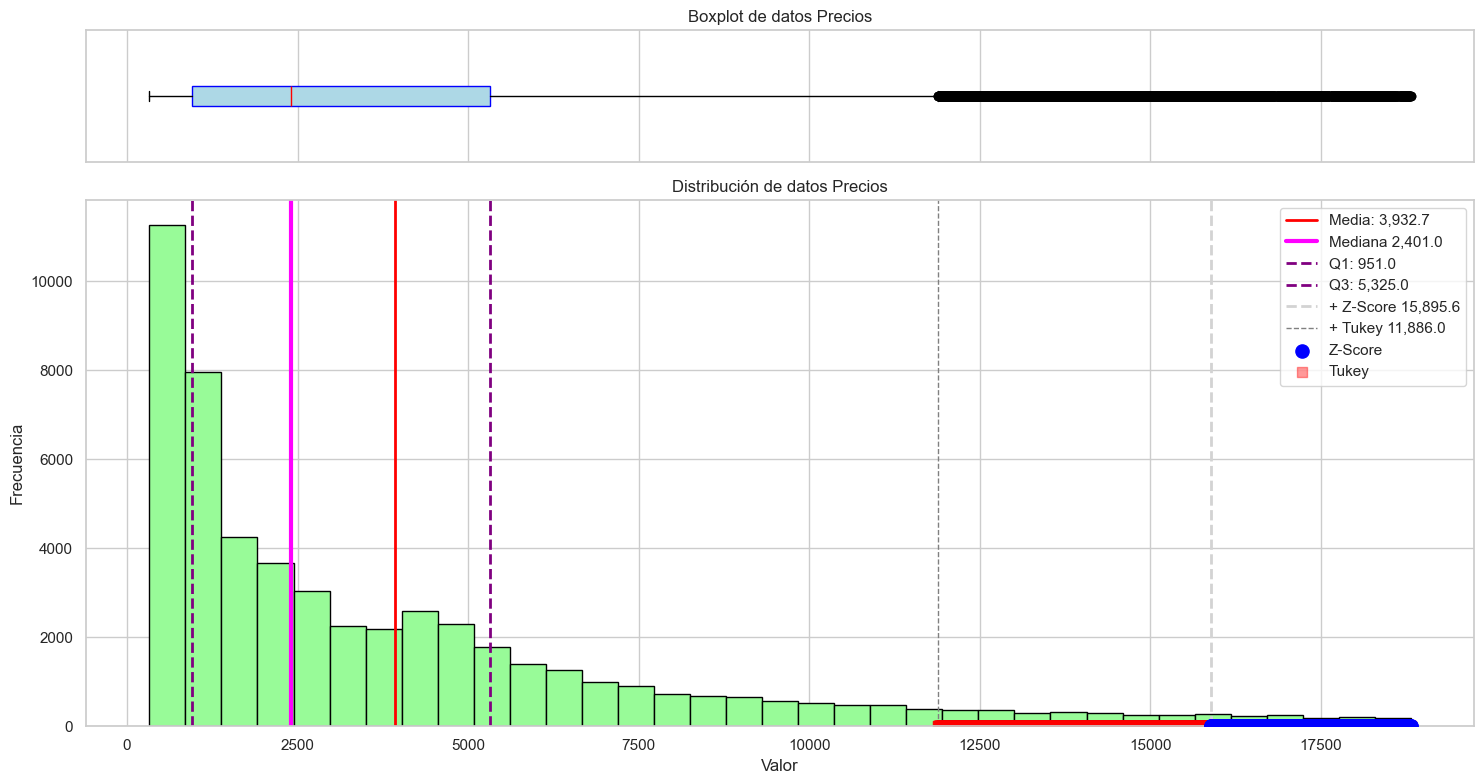

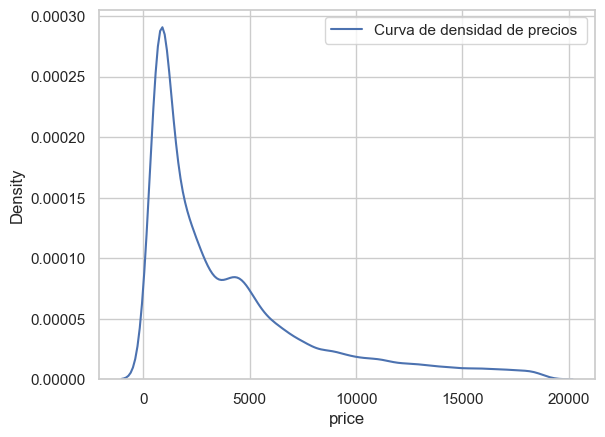

In [44]:
# Calcular los estadísticos para precios
price = df['price']
estadisticos_price = estadisticos(price)
print("Estadísticos para precios:")
imprimir_estadisticas(estadisticos_price)
plot_data(price, 'Precios')

sns.kdeplot(price, label=f"Curva de densidad de precios ")
plt.legend();


Calcular asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada y visualización con seaborn:

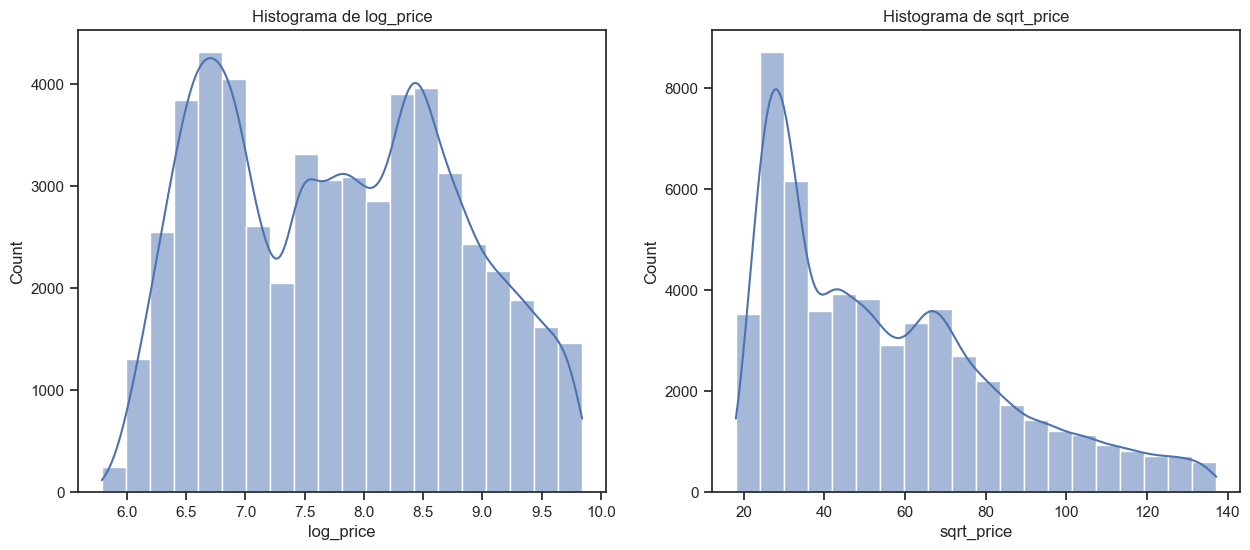

Asimetría: 1.6182250378540057, Curtosis: 2.17836501665563


In [72]:
# Calcular asimetría y curtosis
skewness = skew(df['price'])
kurt = kurtosis(df['price'])

# Transformación logarítmica
df['log_price'] = np.log(df['price'])

# Transformación raíz cuadrada
df['sqrt_price'] = np.sqrt(df['price'])

# Visualización con seaborn
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], bins=20, kde=True)
plt.title('Histograma de log_price')

plt.subplot(1, 2, 2)
sns.histplot(df['sqrt_price'], bins=20, kde=True)
plt.title('Histograma de sqrt_price')

plt.show()

print(f'Asimetría: {skewness}, Curtosis: {kurt}')


Visualización de boxplot por tipo de corte (cut) y transformación de la escala con seaborn:

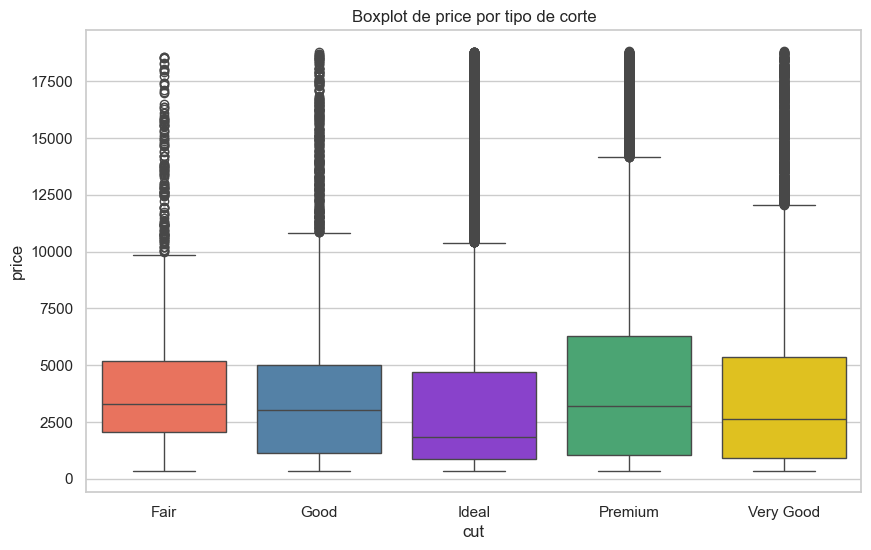

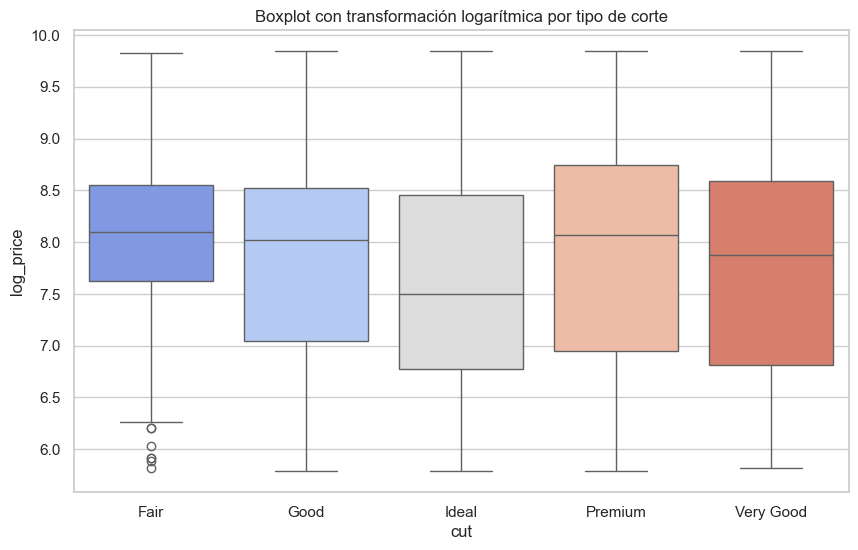

In [46]:
# Visualización de boxplot por tipo de corte
plt.figure(figsize=(10, 6))
custom_palette = ['#FF6347', '#4682B4', '#8A2BE2', '#3CB371', '#FFD700']
sns.boxplot(x='cut', y='price', data=df, hue='cut', palette=custom_palette, legend=False)
plt.title('Boxplot de price por tipo de corte')
plt.show()

# Transformación de la escala (opcional)
df['log_price'] = np.log(df['price'])

# Visualización de boxplot con transformación logarítmica y paleta personalizada
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='log_price', data=df, hue='cut', palette='coolwarm', legend=False)
plt.title('Boxplot con transformación logarítmica por tipo de corte')
plt.show()

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut

In [47]:

# Crear los bins usando np.linspace
bins = np.linspace(min(df["price"]), max(df["price"]), 4) 
labels = ['Barato', 'Medio', 'Caro']

# Discretizar la columna price
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
df['price_cat'] = df['price_category']

df['price_category'].value_counts()

price_category
Barato    43473
Medio      7330
Caro       2991
Name: count, dtype: int64

In [48]:
df = pd.get_dummies(df, columns=['price_category'])

PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:

Histogramas y Curvas de Densidad:

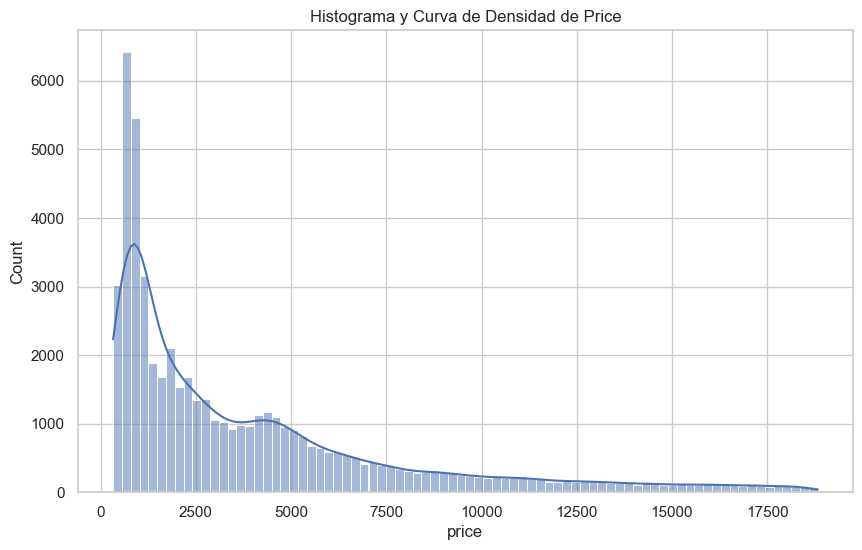

In [49]:
# Histograma y curva de densidad para la columna 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Histograma y Curva de Densidad de Price')
plt.show()


Boxplot: lo hacemos con plotly express

In [50]:
plt.figure(figsize=(10, 6))
px.box(x=df['price'])

<Figure size 1000x600 with 0 Axes>

Countplot: por tipos de corte

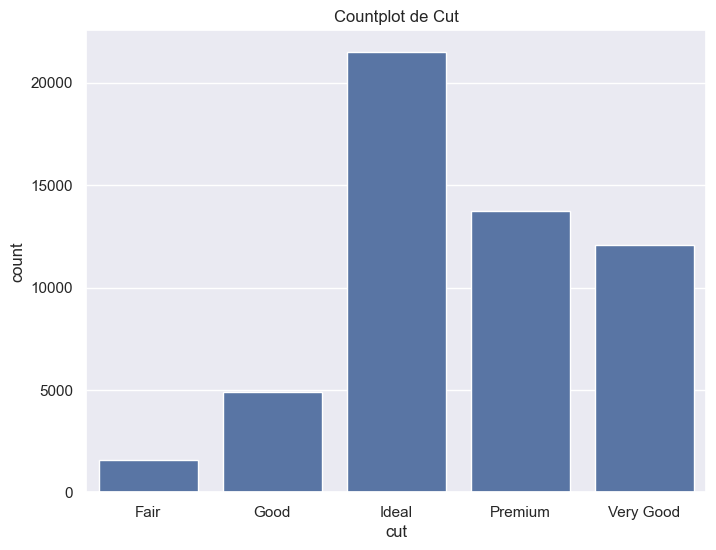

In [51]:
# Visualización de countplot con estilo de fondo
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.countplot(x='cut', data=df)
plt.title('Countplot de Cut')
plt.show()

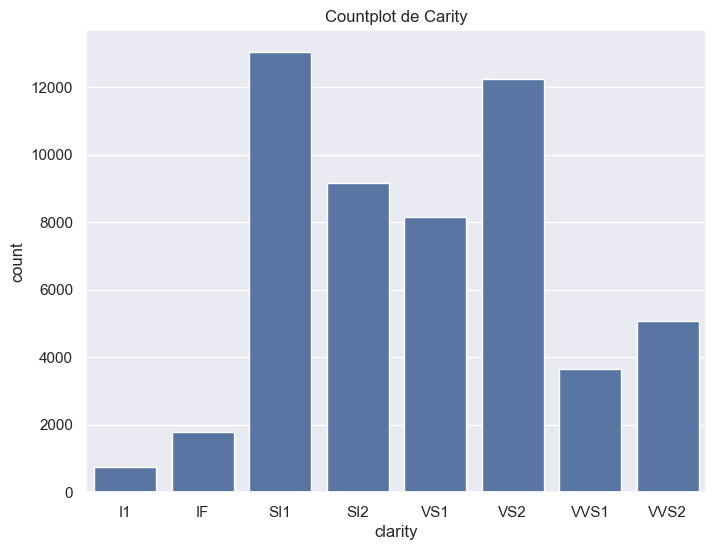

In [52]:
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.countplot(x=df['clarity'])
plt.title('Countplot de Carity')
plt.show()


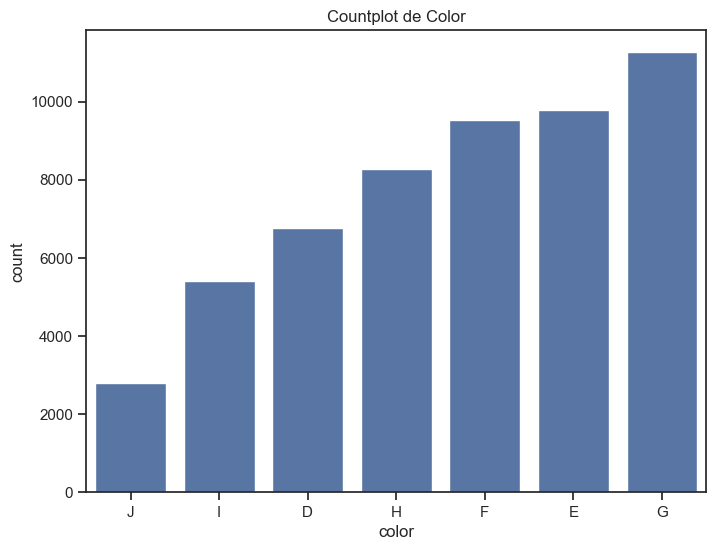

In [53]:
plt.figure(figsize=(8, 6))
sns.set_style("ticks")
sns.countplot(df,x='color', order=df['color'].value_counts(ascending=True).index)
plt.title('Countplot de Color')
plt.show()


    * bivariantes y multivariantes

Scatterplot con hue, size, style:

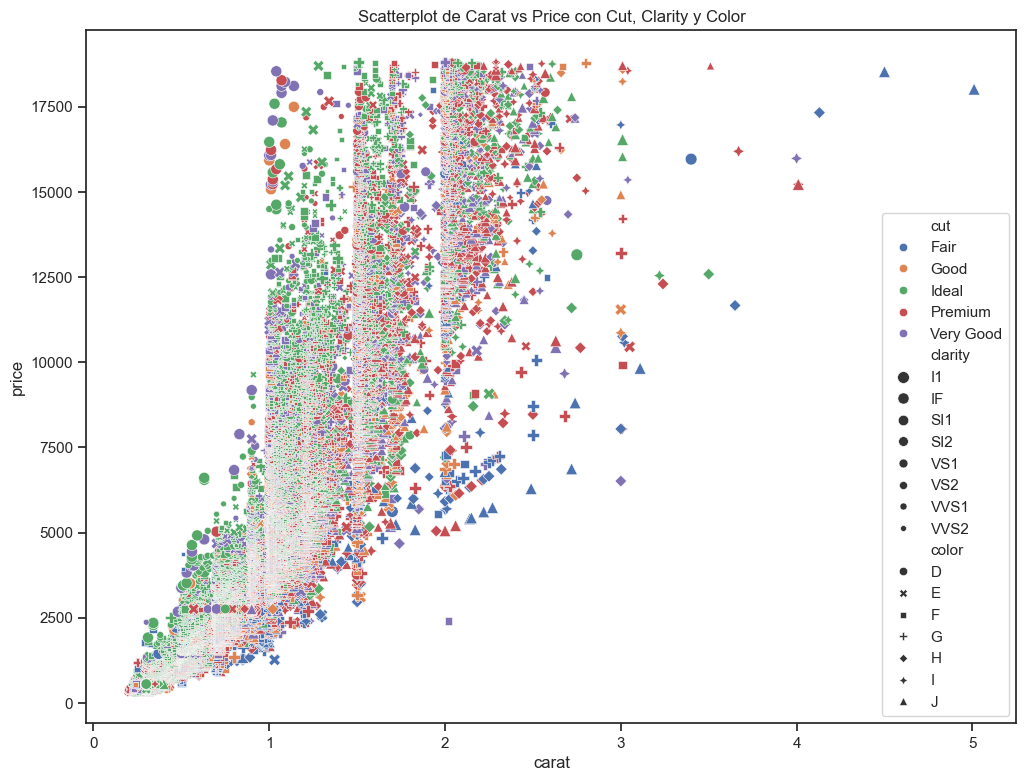

In [54]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x='carat', y='price', hue='cut', size='clarity', style='color', data=df)
plt.title('Scatterplot de Carat vs Price con Cut, Clarity y Color')
plt.show()


Calcular Correlación con Pandas y Mostrarla con Seaborn:
Convertimos los tipos category por medio de cat.codes para poderlos usar en el headmap

In [55]:
df['cut Ord'] = df['cut'].cat.codes
df['color Ord'] = df['color'].cat.codes
df['clarity Ord'] = df['clarity'].cat.codes

In [56]:
# Seleccionar sólo las columnas numéricas
df_numerical = df.select_dtypes(include=['float64', 'int64' ,'int32', 'float32', 'int8', 'bool'])
df_numerical.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_ord',
       'tipo_Bueno', 'tipo_Excelente', 'tipo_Normal', 'price_iva',
       'price_discount', 'volumen', 'log_price', 'sqrt_price',
       'price_category_Barato', 'price_category_Medio', 'price_category_Caro',
       'cut Ord', 'color Ord', 'clarity Ord'],
      dtype='object')

In [57]:
df_numerical = df_numerical[['carat', 'cut Ord', 'color Ord', 'clarity Ord', 'depth', 'table', 'price', 'tipo_Normal', 'tipo_Bueno',
                            'tipo_Excelente', 'price_category_Barato','price_category_Medio', 'price_category_Caro' ]]

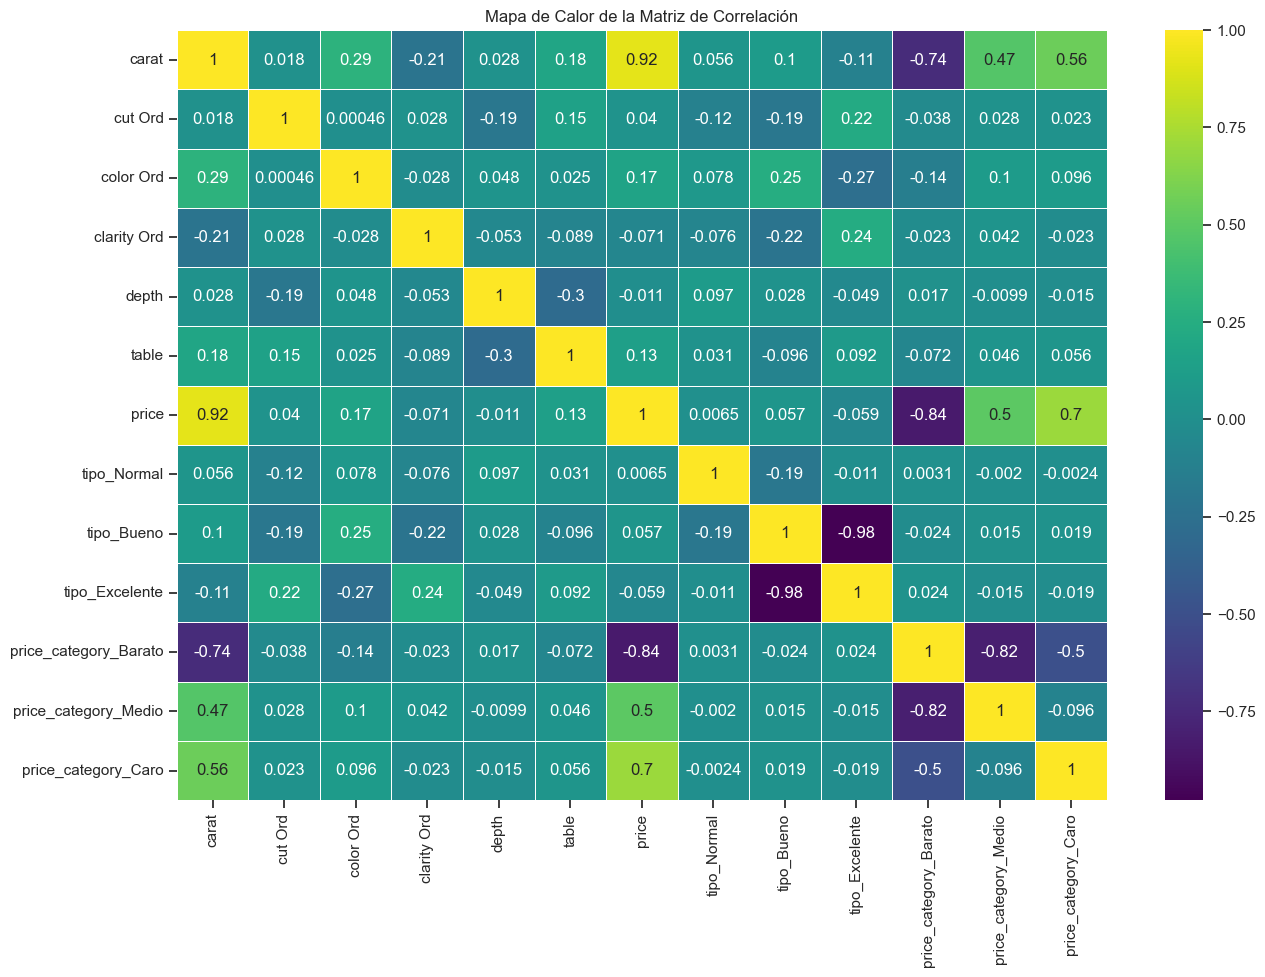

In [58]:
# Calcular la matriz de correlación
corr_matrix = df_numerical.corr()

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


Correlación en un Gráfico de Barras para la Columna 'price':

In [59]:
# Correlación de todas las columnas con 'price'
corr_price = corr_matrix['price'].drop('price')
corr_price


carat                    0.921448
cut Ord                  0.039969
color Ord                0.171755
clarity Ord             -0.071185
depth                   -0.010975
table                    0.126686
tipo_Normal              0.006542
tipo_Bueno               0.056647
tipo_Excelente          -0.059094
price_category_Barato   -0.844520
price_category_Medio     0.502538
price_category_Caro      0.698841
Name: price, dtype: float64

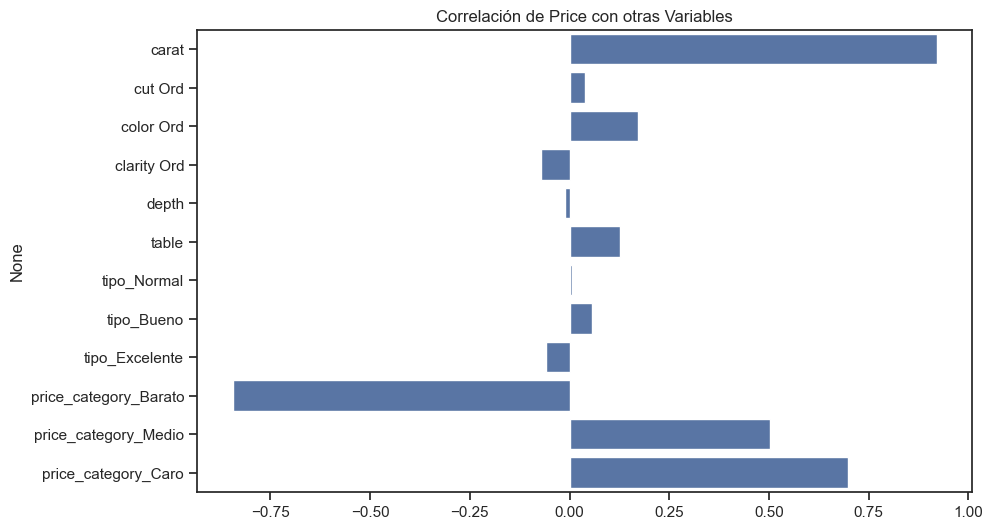

In [60]:
# Crear un gráfico de barras para mostrar la correlación
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_price.values, y=corr_price.index,)
plt.title('Correlación de Price con otras Variables')
plt.show()


Pivot Table y Heatmap:

In [61]:
pivot_table = df.pivot_table(index='cut', columns='color', values='price', observed=True)
pivot_table


color                D            E            F            G            H  \
cut                                                                          
Fair       4291.061350  3689.743243  3834.750809  4227.000000  5091.307692   
Good       3408.107576  3425.748657  3497.254405  4114.074799  4247.040057   
Ideal      2635.822112  2604.954300  3378.721131  3730.748921  3896.114369   
Premium    3634.493433  3542.385242  4327.297286  4498.782728  5217.907274   
Very Good  3472.662252  3209.910722  3770.670828  3874.210183  4524.835074   

color                I            J  
cut                                  
Fair       4607.534483  4975.655462  
Good       5032.471042  4587.833333  
Ideal      4445.795117  4922.871365  
Premium    5934.466245  6287.733251  
Very Good  5254.621779  5110.304284

<Axes: xlabel='color', ylabel='cut'>

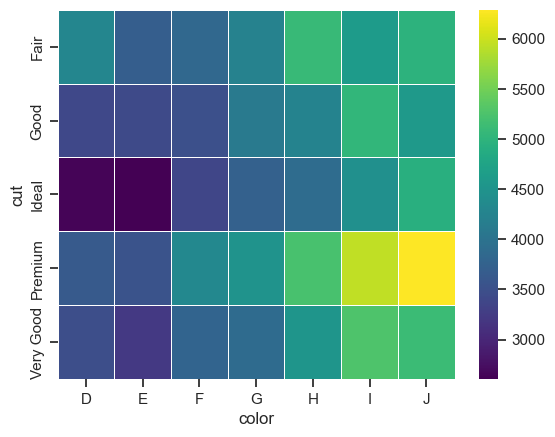

In [62]:
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.5)

Combinación de Visualizaciones con relplot:

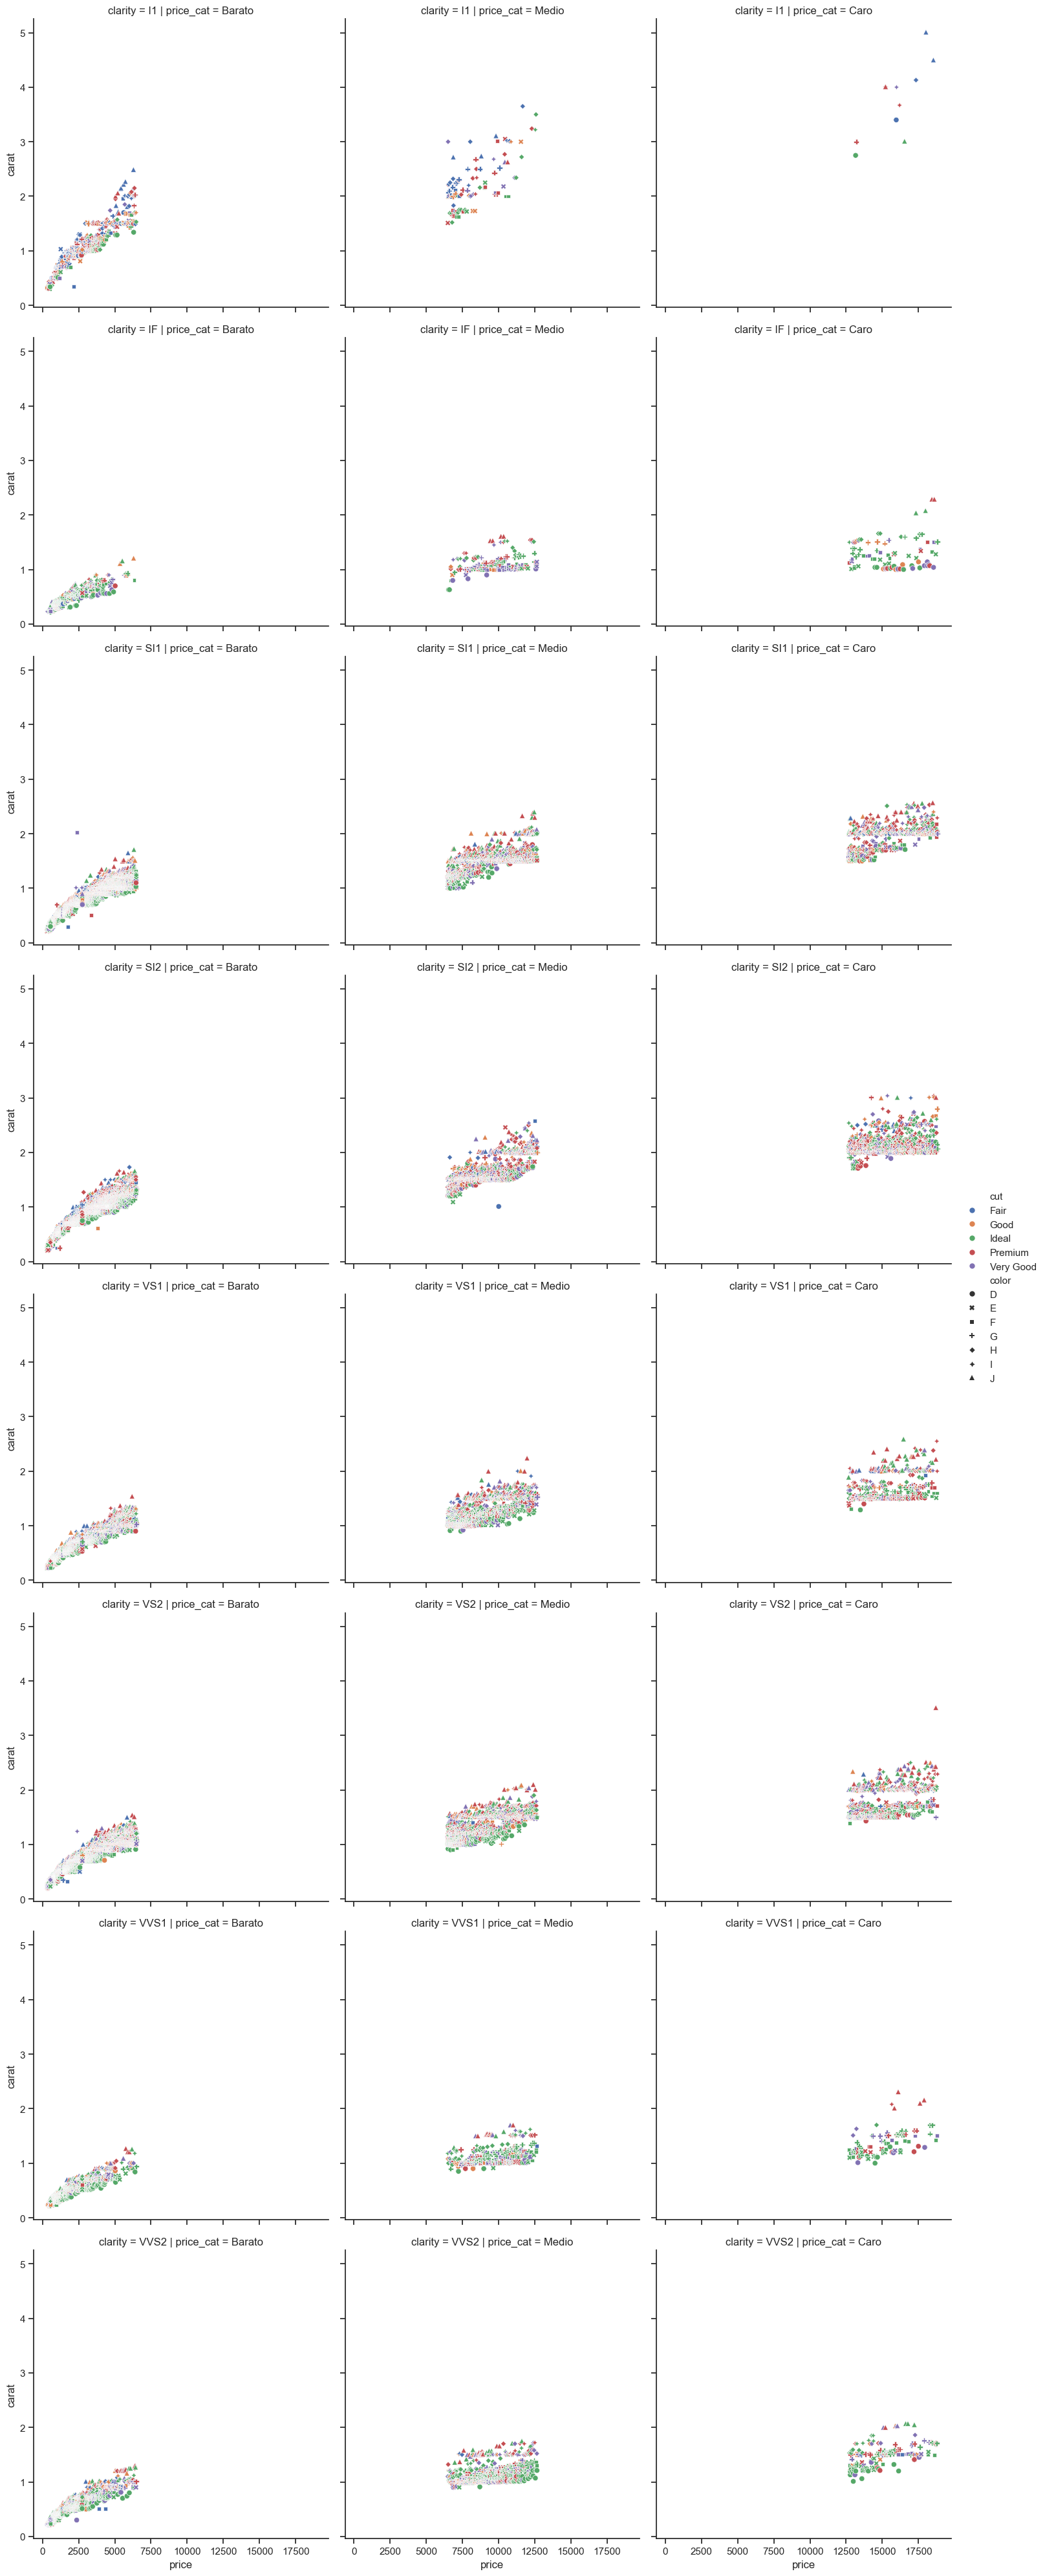

In [63]:
# Combinación con hue, style, size, row y col
sns.relplot(df, x='price', y='carat', hue='cut', style='color', col='price_cat', row= 'clarity')
plt.show()

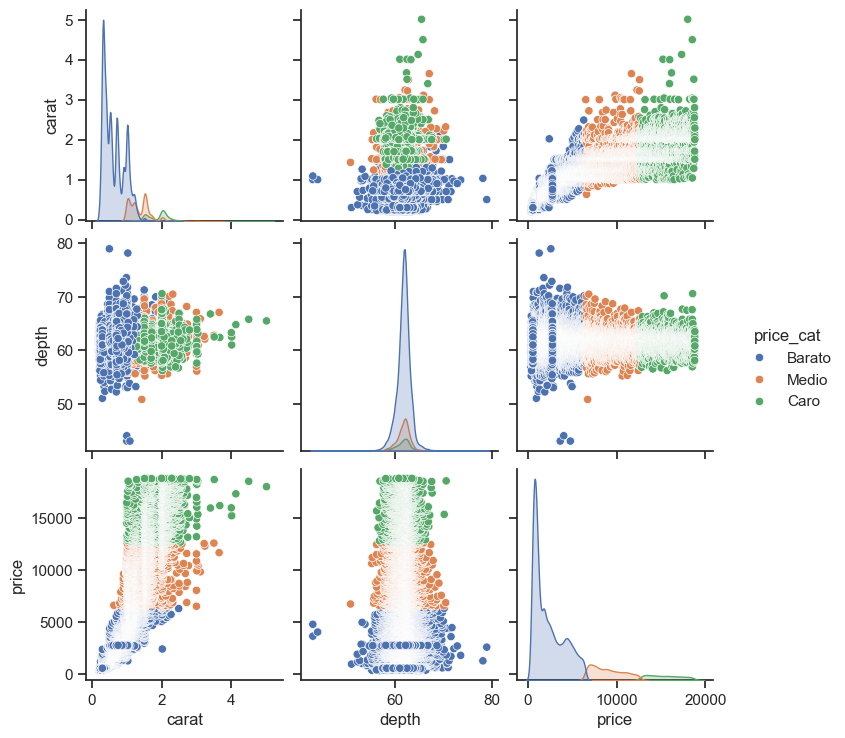

In [64]:
sns.pairplot(df, vars=['carat', 'depth', 'price'], hue='price_cat')

In [65]:
df.groupby('cut',observed=True).agg({'price':'median'})

price
cut              
Fair       3282.0
Good       3042.0
Ideal      1813.0
Premium    3182.0
Very Good  2644.0

In [66]:
# violin plot
px.violin(df, x='price')

Grafico de sectores por categoria de precio

In [67]:
px.pie(df, values = 'price', names='price_cat')

Grafico de sectores por tipo de corte

In [68]:
px.pie(df, values = 'price', names='cut')

- Filtra por las tipo caro y hacer una grafica como la anterior para ver como la distribución

In [69]:
df_caros = df[df['price_cat'].str.contains('Caro')]

In [70]:
px.pie(df_caros, values = 'price', names='cut')

Grafico de sectotes dinamico con plotly Expres

In [71]:
fig = px.sunburst(df, 
                  values='price', 
                  path=['cut', 'color'],
                  color='cut',  
                  color_discrete_sequence=px.colors.qualitative.Vivid,  
                  hover_data={'price':':,.2f'})


fig.show()

C:\Users\cpami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\cpami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

